# CLDN16 gpc

In [9]:
import genophenocorr
from genophenocorr.preprocessing import configure_caching_cohort_creator, load_phenopacket_folder
from genophenocorr.preprocessing import UniprotProteinMetadataService, VVTranscriptCoordinateService
from genophenocorr.analysis import configure_cohort_analysis, CohortAnalysisConfiguration
from genophenocorr.model import VariantEffect
from genophenocorr.model.genome import GRCh38
from genophenocorr.analysis.predicate import PatientCategories
from genophenocorr.view import CohortViewable, ProteinVisualizable, ProteinVisualizer
from IPython.display import HTML, display
import hpotk

print(f"Using genophenocorr version {genophenocorr.__version__}")

Using genophenocorr version 0.1.1dev


In [3]:
import hpotk
hpotk.util.setup_logging()

In [4]:
fpath_hpo = 'https://github.com/obophenotype/human-phenotype-ontology/releases/download/v2023-10-09/hp.json'
hpo = hpotk.load_minimal_ontology(fpath_hpo)

In [5]:
from genophenocorr.preprocessing import configure_caching_cohort_creator, load_phenopacket_folder

fpath_phenopackets = '../../../phenopacket-store/notebooks/CLDN16/phenopackets/'
cohort_creator = configure_caching_cohort_creator(hpo)
cohort = load_phenopacket_folder(fpath_phenopackets, cohort_creator)

Patients Created: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 46/46 [00:00<00:00, 252.09it/s]
Validated under none policy
Showing errors and warnings
46 phenopacket(s) found at `../../../phenopacket-store/notebooks/CLDN16/phenopackets/`
  patient #36
    variants
     warnings:
     ·Expected a VCF record, a VRS CNV, or an expression with `hgvs.c` but had an error retrieving any from patient nan[PMID_32869508_nan]. Remove variant from testing
  patient #39
    variants
     warnings:
     ·Expected a VCF record, a VRS CNV, or an expression with `hgvs.c` but had an error retrieving any from patient patient[PMID_26136118_patient]. Remove variant from testing
     ·Patient PMID_26136118_patient has no variants to work with
  patient #40
    variants
     warnings:
     ·Expected a VCF record, a VRS CNV, or an expression with `hgvs.c` but had an error retrieving any from patient Patient 5[PMID_26426912_Patient_5]. Re

In [6]:
CLDN16_transcript = 'NM_006580.4' # version number important, nucleotide numbering changed compared to version 3

In [11]:
cohort.list_all_proteins()

[('NP_001365421.1', 57), ('NP_001365422.1', 57), ('NP_006571.2', 57)]

In [10]:
from genophenocorr.view import CohortViewable
viewer = CohortViewable(hpo)
display(HTML(viewer.process(cohort=cohort, transcript_id=CLDN16_transcript)))

HPO Term,ID,Annotation Count
Nephrocalcinosis,HP:0000121,45
Hypercalciuria,HP:0002150,41
Hypermagnesiuria,HP:0012608,32
Renal magnesium wasting,HP:0005567,30
Elevated circulating parathyroid hormone level,HP:0003165,29
Renal insufficiency,HP:0000083,28
Polyuria,HP:0000103,23
Polydipsia,HP:0001959,22
Hypomagnesemia,HP:0002917,20
Recurrent urinary tract infections,HP:0000010,16


<Axes: title={'center': 'Claudin-16\ntranscript: NM_006580.4, protein: NP_006571.1'}>

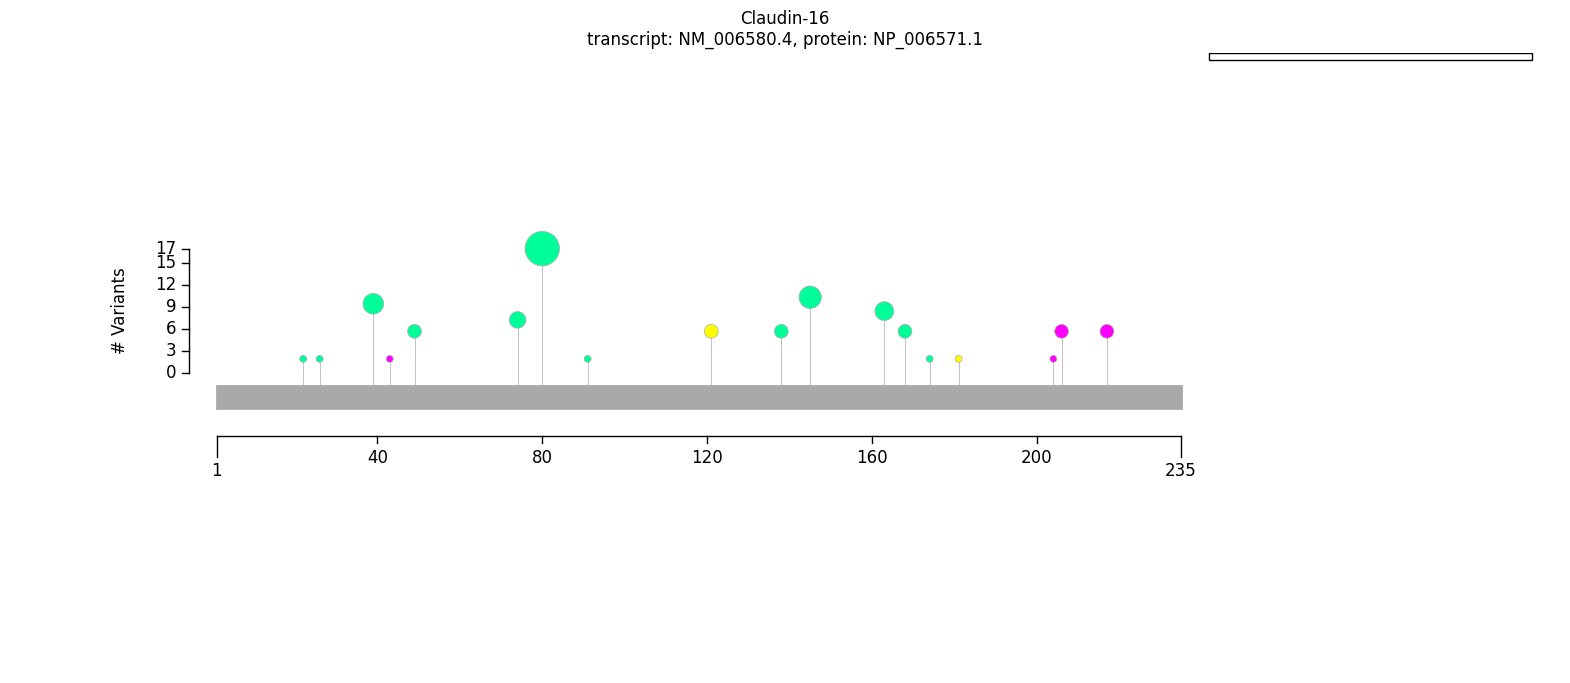

In [13]:
from genophenocorr.preprocessing import UniprotProteinMetadataService
from genophenocorr.model.genome import GRCh38
from genophenocorr.preprocessing import VVTranscriptCoordinateService
pms = UniprotProteinMetadataService()
protein_meta = pms.annotate('NP_006571.1')
txc_service = VVTranscriptCoordinateService(genome_build=GRCh38)
tx_coordinates = txc_service.fetch(CLDN16_transcript)
from genophenocorr.view import ProteinVisualizable, ProteinVisualizer
pvis = ProteinVisualizable(tx_coordinates=tx_coordinates, protein_meta=protein_meta, cohort=cohort)
drawer = ProteinVisualizer()
drawer.draw_fig(pvis=pvis)

In [17]:
from genophenocorr.analysis import configure_cohort_analysis
from genophenocorr.analysis.predicate import GenotypeBooleanPredicate, PatientCategories

analysis = configure_cohort_analysis(cohort, hpo)

In [18]:
from genophenocorr.model import VariantEffect

missense = analysis.compare_by_recessive_variant_effect(VariantEffect.MISSENSE_VARIANT, CLDN16_transcript)
missense.summarize(hpo, PatientCategories.YES)

MISSENSE_VARIANT on NM_006580.4                     Both            One  \
                                                   Count Percent  Count   
Nephrolithiasis [HP:0000787]                         0/9      0%   7/21   
Stage 5 chronic kidney disease [HP:0003774]          0/0      0%    1/8   
Chronic kidney disease [HP:0012622]                  0/0      0%    2/8   
Failure to thrive [HP:0001508]                       1/9     11%   6/15   
Hypocalcemia [HP:0002901]                            0/0      0%    8/9   
...                                                  ...     ...    ...   
Abnormal urine output [HP:0012590]                   7/7    100%  13/13   
Hypocitraturia [HP:0012405]                          4/7     57%   6/13   
Abnormal bone structure [HP:0003330]                 1/1    100%    1/1   
Abnormal enzyme concentration or activity [HP:0...   0/0      0%    0/0   
Abnormality of the hand [HP:0001155]                 0/0      0%    1/1   

MISSENSE_VARIANT on NM_006580.4                            Neither          \
                                                   Percent   Count Percent   
Nephrolithiasis [HP:0000787]                           33%     1/1    100%   
Stage 5 chronic kidney disease [HP:0003774]            12%     3/3    100%   
Chronic kidney disease [HP:0012622]                    25%     3/3    100%   
Failure to thrive [HP:0001508]                         40%     1/1    100%   
Hypocalcemia [HP:0002901]                              89%     2/6     33%   
...                                                    ...     ...     ...   
Abnormal urine output [HP:0012590]                    100%     3/3    100%   
Hypocitraturia [HP:0012405]                            46%     0/0      0%   
Abnormal bone structure [HP:0003330]                  100%     0/0      0%   
Abnormal enzyme concentration or activity [HP:0...      0%     1/1    100%   
Abnormality of the hand [HP:0001155]                  100%     0/0      0%   

MISSENSE_VARIANT on NM_006580.4                                                 
                                                     p value Corrected p value  
Nephrolithiasis [HP:0000787]                        0.020655               1.0  
Stage 5 chronic kidney disease [HP:0003774]         0.024242               1.0  
Chronic kidney disease [HP:0012622]                 0.060606               1.0  
Failure to thrive [HP:0001508]                      0.075640               1.0  
Hypocalcemia [HP:0002901]                           0.088911               1.0  
...                                                      ...               ...  
Abnormal urine output [HP:0012590]                  1.000000               1.0  
Hypocitraturia [HP:0012405]                         1.000000               1.0  
Abnormal bone structure [HP:0003330]                1.000000               1.0  
Abnormal enzyme concentration or activity [HP:0...  1.000000               1.0  
Abnormality of the hand [HP:0001155]                1.000000               1.0  

[173 rows x 8 columns]

In [19]:
hpo.get_term("HP:0000118").name

'Phenotypic abnormality'